#**Neural Network - A Simple Perceptron |Assignment**

# Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

- Deep Learning (DL) is a subfield of Machine Learning (ML) that uses artificial neural networks with many layers (deep neural networks) to automatically learn patterns and representations from large amounts of data. It is especially powerful for complex tasks like image recognition, speech processing, natural language understanding, and autonomous systems.
* Brief evolution

Early neural network ideas appeared in the 1950s–1980s, but limited data and compute restricted their practical impact.

Around the late 2000s and early 2010s, the combination of large datasets, powerful GPUs, and improved architectures (e.g., deep convolutional and recurrent networks) led to breakthrough results in vision, speech, and NLP, marking the rise of modern deep learning.

* Difference Between Deep Learning and Traditional Machine Learning.
1. Feature Engineering
*  Manual (human-designed features)
* Automatic feature learning
2. Data Requirement
* Works with small to medium datasets
* Requires large datasets
3. Model Complexity
* Shallow models
* Deep neural networks
4. Performance
*	Good for simple problems
* Excellent for complex problems
5. Computation
* Less computational power
* High computational power (GPUs/TPUs)
6. Examples
* Linear Regression, SVM, KNN
* CNN, RNN, Transformers

# Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

- A perceptron is the simplest artificial neuron model used for binary classification, which computes a weighted sum of inputs, adds a bias, passes it through a step activation, and outputs 0 or 1.

Basic architecture
1. A perceptron has inputs x1,x2....xn  associated weights w1,w2...wn, a bias term b, a summation unit, and an activation (usually a step) function.
2. Summation Function: A function that calculates the weighted sum of the inputs. This is the net input to the neuron, calculated as:\(Z=(x_{1}*w_{1})+(x_{2}*w_{2})+\dots +(x_{n}*w_{n})=\sum _{i=1}^{n}x_{i}w_{i}\).

* Functioning
For supervised learning, the perceptron compares its prediction y^ with the true label y; if there is an error, it updates weights using the perceptron learning rule Wi--Wi+n(y-y^)Xi and similarly updates the bias.
​
This process repeats over the training set for multiple epochs until the perceptron finds a separating hyperplane (if one exists) or reaches a maximum number of iterations.
* Key limitations
A single-layer perceptron can only learn linearly separable decision boundaries; it cannot solve problems like XOR, which are not linearly separable.

It is restricted to binary outputs with a hard step function, offers limited expressiveness and no internal representation learning, and becomes inadequate for complex, non-linear real-world tasks without extension to multilayer networks.

# Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

- Activation functions introduce non-linearity into neural networks so they can model complex relationships instead of behaving like a single linear model, and they also provide gradients for learning via backpropagation.


* Purpose of activation functions

They transform the neuron’s weighted sum into an output, deciding whether the neuron should “fire” and passing non-linear signals to the next layer.

Without them, stacking layers would still yield an overall linear mapping, severely limiting the network’s ability to capture real-world non-linear patterns.
* Comparison summary
Sigmoid: bounded (0, 1), good for output layers in binary classification, but non‑zero‑centered and prone to vanishing gradients.
​

Tanh: bounded (‑1, 1), zero‑centered and often preferable to sigmoid in hidden layers, yet still affected by vanishing gradients.
​

ReLU: unbounded positive range, sparse activations and faster training in deep nets, widely used in hidden layers despite the dead‑neuron issue.

# Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

* Loss function

A loss function gives the error for a single training instance, comparing its predicted output with the true label.

Examples:

Regression: squared error for one sample L= (y-y^)2.

Classification: binary cross‑entropy for one sample in logistic regression.​

* Cost function

A cost function aggregates losses over a dataset (or mini‑batch), typically using mean or sum, giving a single scalar to optimize.

Examples:

Mean Squared Error (MSE): average of squared errors over all samples.​

Average binary cross‑entropy over all samples in a mini‑batch or full training set.

# Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

* Role of optimizers

They use gradients of the loss with respect to parameters to iteratively move the model toward lower loss, affecting convergence speed, stability, and final performance.

Different optimizers apply different update rules (learning rate schedules, momentum, adaptive scaling), which can make a big difference on deep, noisy, or sparse problems.

* Gradient Descent (basic SGD)

Uses the gradient of the loss to update each parameter:0 ← 0 - η∇ θ L, with a fixed global learning rate η.

Pros: Simple and memory‑efficient; cons: sensitive to learning rate choice, can be slow to converge and can get stuck or oscillate in ravines.

* RMSprop

Maintains an exponentially decaying average of past squared gradients for each parameter and divides the gradient by the root of this average.

This yields an adaptive per‑parameter learning rate: parameters with consistently large gradients get smaller effective steps, helping with non‑stationary and noisy objectives and often converging faster than plain SGD.

* Adam

Combines ideas of momentum and RMSprop: keeps an exponential moving average of the gradients (first moment) and of squared gradients (second moment), plus bias corrections.

Provides per‑parameter adaptive learning rates with momentum, typically converging quickly with little tuning, and is a common default for deep learning, though it can sometimes generalize worse than well‑tuned SGD on some tasks.



In [2]:
# Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
import numpy as np

# Step (activation) function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training data for AND gate
# Inputs: (x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Targets: AND outputs
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
np.random.seed(0)
weights = np.random.randn(2)
bias = 0.0

learning_rate = 0.1
epochs = 20

for epoch in range(epochs):
    for i in range(len(X)):
        x_i = X[i]
        target = y[i]

        # Linear combination
        z = np.dot(x_i, weights) + bias

        # Prediction
        y_hat = step_function(z)

        # Perceptron update rule
        error = target - y_hat
        weights += learning_rate * error * x_i
        bias += learning_rate * error

# Testing the trained perceptron on all AND inputs
print("Trained weights:", weights)
print("Trained bias:", bias)

for x in X:
    z = np.dot(x, weights) + bias
    y_hat = step_function(z)
    print(f"Input: {x}, Predicted AND: {int(y_hat)}")






Trained weights: [0.96405235 0.20015721]
Trained bias: -1.0999999999999999
Input: [0 0], Predicted AND: 0
Input: [0 1], Predicted AND: 0
Input: [1 0], Predicted AND: 0
Input: [1 1], Predicted AND: 1


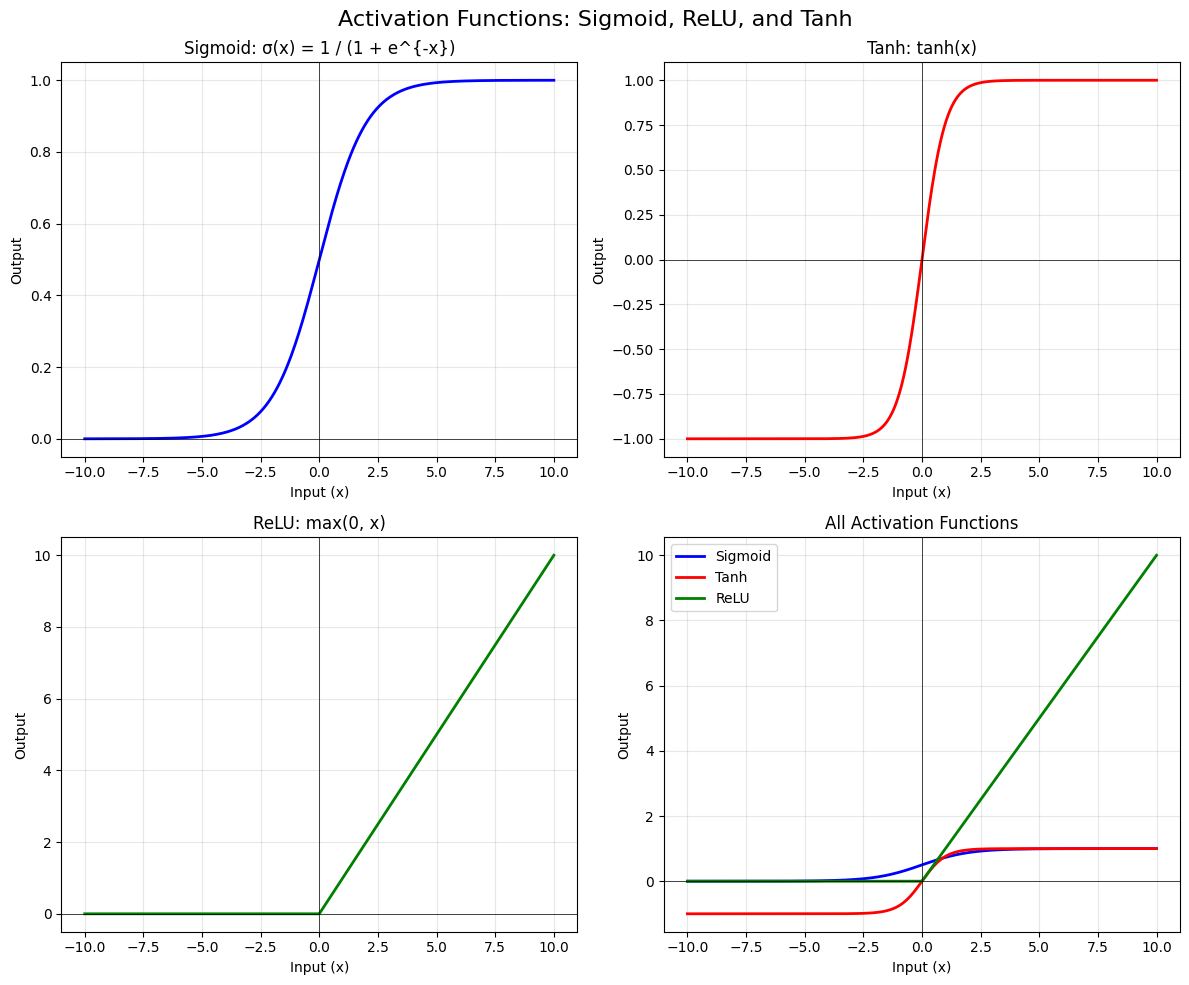

In [3]:
# Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to avoid overflow

def tanh_func(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Generate input range
x = np.linspace(-10, 10, 500)

# Compute outputs
y_sigmoid = sigmoid(x)
y_tanh = tanh_func(x)
y_relu = relu(x)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Activation Functions: Sigmoid, ReLU, and Tanh', fontsize=16)

# Plot Sigmoid
axes[0, 0].plot(x, y_sigmoid, 'b-', linewidth=2)
axes[0, 0].set_title('Sigmoid: σ(x) = 1 / (1 + e^{-x})')
axes[0, 0].set_xlabel('Input (x)')
axes[0, 0].set_ylabel('Output')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(0, color='k', linewidth=0.5)
axes[0, 0].axvline(0, color='k', linewidth=0.5)

# Plot Tanh
axes[0, 1].plot(x, y_tanh, 'r-', linewidth=2)
axes[0, 1].set_title('Tanh: tanh(x)')
axes[0, 1].set_xlabel('Input (x)')
axes[0, 1].set_ylabel('Output')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(0, color='k', linewidth=0.5)
axes[0, 1].axvline(0, color='k', linewidth=0.5)

# Plot ReLU
axes[1, 0].plot(x, y_relu, 'g-', linewidth=2)
axes[1, 0].set_title('ReLU: max(0, x)')
axes[1, 0].set_xlabel('Input (x)')
axes[1, 0].set_ylabel('Output')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(0, color='k', linewidth=0.5)
axes[1, 0].axvline(0, color='k', linewidth=0.5)

# Combined plot
axes[1, 1].plot(x, y_sigmoid, 'b-', label='Sigmoid', linewidth=2)
axes[1, 1].plot(x, y_tanh, 'r-', label='Tanh', linewidth=2)
axes[1, 1].plot(x, y_relu, 'g-', label='ReLU', linewidth=2)
axes[1, 1].set_title('All Activation Functions')
axes[1, 1].set_xlabel('Input (x)')
axes[1, 1].set_ylabel('Output')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(0, color='k', linewidth=0.5)
axes[1, 1].axvline(0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


In [4]:
# Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0,1]
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((60000, 28 * 28))  # Flatten to 784 features
x_test = x_test.reshape((10000, 28 * 28))

# Build the multilayer neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile with optimizer, loss, and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels (0-9)
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

# Print final training accuracy
final_train_acc = history.history['accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7577 - loss: 0.7657 - val_accuracy: 0.9489 - val_loss: 0.1727
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9354 - loss: 0.2151 - val_accuracy: 0.9636 - val_loss: 0.1224
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9539 - loss: 0.1545 - val_accuracy: 0.9695 - val_loss: 0.0987
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9625 - loss: 0.1250 - val_accuracy: 0.9719 - val_loss: 0.0935
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9692 - loss: 0.1031 - val_accuracy: 0.9753 - val_loss: 0.0807
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9707 - loss: 0.0941 - val_accuracy: 0.9746 - val_loss: 0.0800
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9742 - loss: 0.0831 - val_accuracy: 0.9773 - val_loss: 0.0751
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9758 - loss: 0.0743 - val_accuracy: 0.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7816 - loss: 0.6323 - val_accuracy: 0.8507 - val_loss: 0.4327
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8600 - loss: 0.3857 - val_accuracy: 0.8660 - val_loss: 0.3769
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8740 - loss: 0.3444 - val_accuracy: 0.8676 - val_loss: 0.3731
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8842 - loss: 0.3152 - val_accuracy: 0.8716 - val_loss: 0.3581
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8900 - loss: 0.2983 - val_accuracy: 0.8658 - val_loss: 0.3827
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8931 - loss: 0.2836 - val_accuracy: 0.8751 - val_loss: 0.3488
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9026 - loss: 0.2644 - val_accuracy: 0.8759 - val_loss: 0.3585
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9020 - loss: 0.26

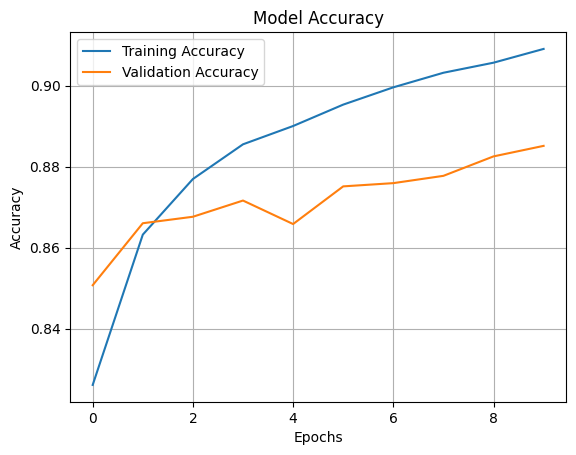

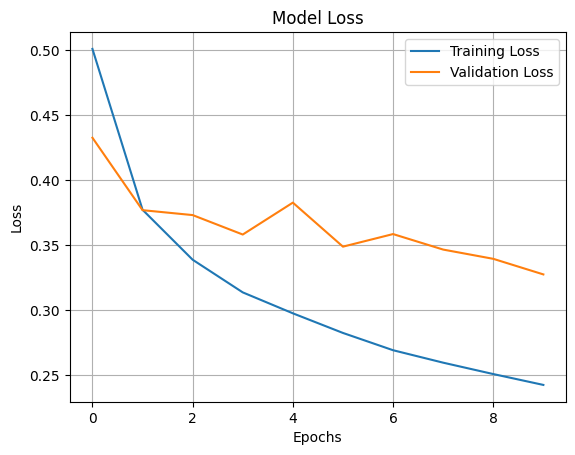

In [6]:
# Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

# 1. Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

# 4. Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# 5. Train model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=1)

# 6. Plot Training & Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.grid(True)
plt.show()

# 7. Plot Training & Validation Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.grid(True)
plt.show()


Class Weights: {0: np.float64(0.510986203372509), 1: np.float64(23.25581395348837)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - accuracy: 0.5047 - loss: 1.0932 - val_accuracy: 0.8838 - val_loss: 0.7194
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4997 - loss: 1.0048 - val_accuracy: 0.9337 - val_loss: 0.6926
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4980 - loss: 1.0118 - val_accuracy: 0.9812 - val_loss: 0.6628
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4947 - loss: 0.8625 - val_accuracy: 0.9825 - val_loss: 0.6358
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4943 - loss: 0.9211 - val_accuracy: 0.9825 - val_loss: 0.6115
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5148 - loss: 0.8888 - val_accuracy: 0.9825 - val_loss: 0.5876
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5009 - loss: 0.8877 - val_accuracy: 0.9775 - val_loss: 0.5745
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5094 - loss: 0.8699 - val_accuracy: 0.9775 - 

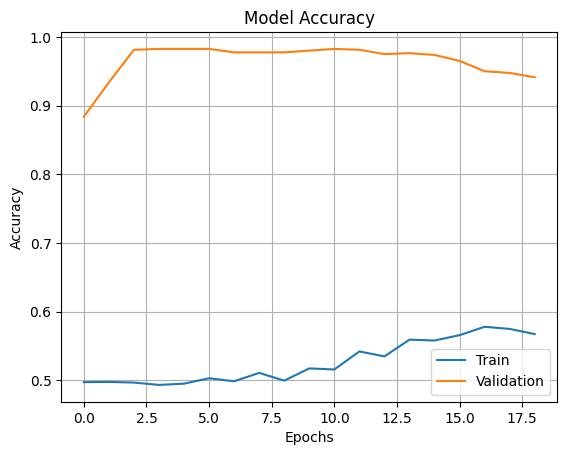

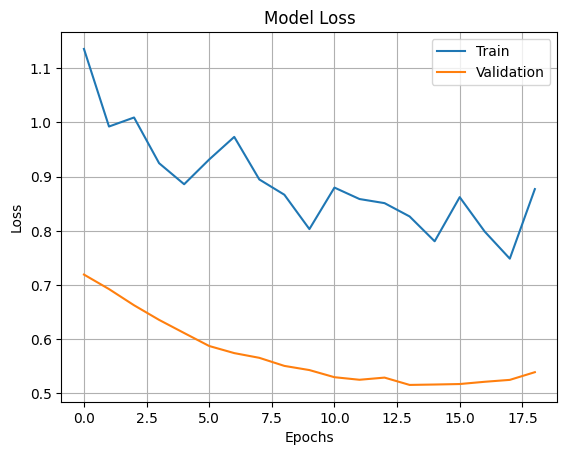

In [9]:
# Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate. Explain your real-time data science workflow:
# ● How would you design a deep learning model (perceptron or multilayer NN)?
# ● Which activation function and loss function would you use, and why?
# ● How would you train and evaluate the model, considering class imbalance?
# ● Which optimizer would be suitable, and how would you prevent overfitting?

# ================================
# 1. Import Libraries
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# ================================
# 2. Load Dataset
# ================================
# Example: fraud_data.csv
# Target column: is_fraud (0 = Legit, 1 = Fraud)

df = pd.read_csv("/content/sample_data/fraud_data.csv")

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# ================================
# 3. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ================================
# 4. Feature Scaling
# ================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================
# 5. Handle Class Imbalance (Class Weights)
# ================================
neg, pos = np.bincount(y_train)
total = neg + pos

class_weight = {
    0: total / (2 * neg),
    1: total / (2 * pos)
}

print("Class Weights:", class_weight)

# ================================
# 6. Build Multilayer Neural Network
# ================================
model = Sequential([
    Dense(128, activation="relu", kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])

# ================================
# 7. Compile Model
# ================================
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ================================
# 8. Early Stopping
# ================================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# ================================
# 9. Train Model
# ================================
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)

# ================================
# 10. Model Evaluation
# ================================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.3).astype(int)  # custom threshold

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ================================
# 11. Plot Loss & Accuracy
# ================================
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid(True)
plt.show()

